In [121]:
import scipy.io as sio
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from PIL import Image
from utils import *
from pca import pca
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from math import *

warnings.filterwarnings("ignore")
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# (a) Hack the CAPTCHA

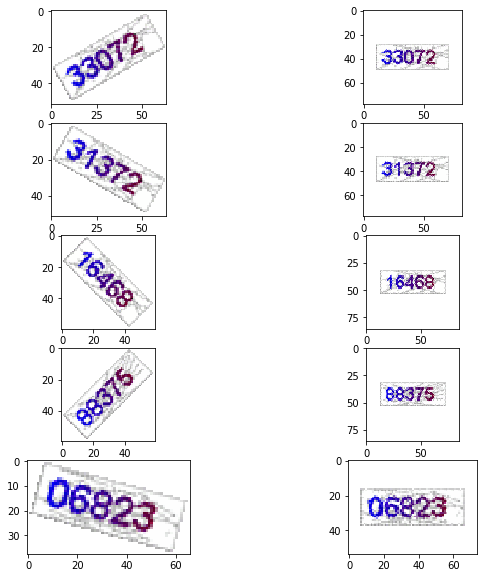

In [118]:
plt.figure(figsize=(10,10))
for i in range(5):
    filename = 'data/%d.gif'%(i+1)
    img = Image.open(filename)
    a_img = np.asarray(img)
    m = np.array(np.where(a_img != 255))
    e_vec, _ = pca(m)
    first_vec = e_vec[:, 0]
    if first_vec[0]<0:
        first_vec = -first_vec
    base_vec = np.array([0, 1]).reshape(-1, 1)
    rot_arc = np.arccos(first_vec.T@base_vec)
    rot_deg = np.sign(rot_arc)*degrees(rot_arc)
    if rot_deg>90:
        rot_deg = -(180-rot_deg)
    rot = img.convert('RGBA').rotate(rot_deg,expand=1)
    fff = Image.new('RGBA', rot.size, (255,)*4)
    out = Image.composite(rot, fff, rot)
    plt.subplot(5,2,i*2+1)
    plt.imshow(img)
    plt.subplot(5,2,i*2+2)
    plt.imshow(out)

# (b) Face image dataset

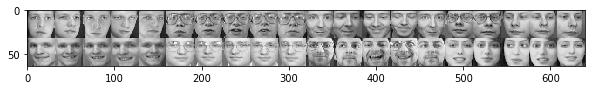

In [129]:
data = sio.loadmat('data/ORL_data.mat')
fea_train,gnd_train,fea_test,gnd_test = data['fea_Train'],data['gnd_Train'],data['fea_Test'],data['gnd_Test']
show_face(fea_train)
e_vec, e_val = pca(fea_train.T)

The test error rate is 0.625000, using PCA with the first 8 components.
The test error rate is 0.510000, using PCA with the first 16 components.
The test error rate is 0.450000, using PCA with the first 32 components.
The test error rate is 0.455000, using PCA with the first 64 components.
The test error rate is 0.435000, using PCA with the first 128 components.


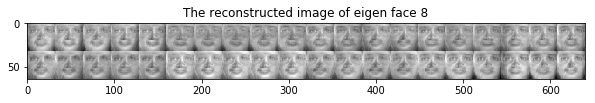

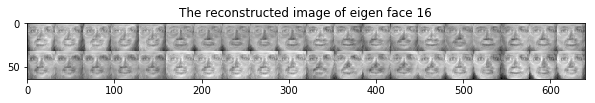

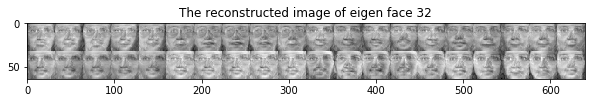

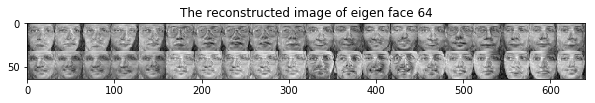

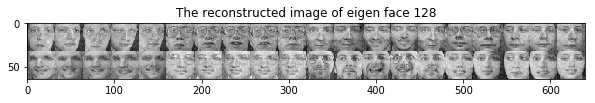

In [131]:
eig_nums = [8, 16, 32, 64, 128]
num_class = np.max(gnd_train)
for eig_num in eig_nums:
    e_v = e_vec[:,:eig_num]
    f_train_trans = fea_train@e_v
    f_test_trans = fea_test@e_v
    knn = KNeighborsClassifier(n_neighbors=10)
    knn.fit(f_train_trans,gnd_train)
    idx = knn.predict(f_test_trans).reshape(-1)
    err_rate = np.sum(idx!=gnd_test.flatten())/gnd_test.shape[0]
    print('The test error rate is %f, using PCA with the first %d components.'%(err_rate, eig_num))      
    reconstruct = e_v@f_train_trans.T
    show_face(reconstruct.T,'The reconstructed image of eigen face %d'%eig_num)

In [132]:
eig_nums = [8, 16, 32, 64, 128]
num_class = np.max(gnd_train)
for eig_num in eig_nums:
    clf = LDA(n_components=eig_num)
    clf.fit(fea_train, gnd_Train)
    idx = clf.predict(fea_test)
    err_rate = np.sum(idx!=gnd_test.flatten())/gnd_test.shape[0]
    print('The test error rate is %f, using LDA with the first %d components.'%(err_rate, eig_num))    

The test error rate is 0.030000, using LDA with the first 8 components.
The test error rate is 0.030000, using LDA with the first 16 components.
The test error rate is 0.030000, using LDA with the first 32 components.
The test error rate is 0.030000, using LDA with the first 64 components.
The test error rate is 0.030000, using LDA with the first 128 components.
